In [1]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
import gensim
import csv
import json
import nltk
from gensim import corpora, models
import numpy as np
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle 
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input, Dense, Dropout, Embedding, Flatten, LSTM, Bidirectional
import itertools
from matplotlib import pyplot
from gensim.models.ldamulticore import LdaMulticore
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
import math
import seaborn as sns
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from scipy.sparse import csr_matrix
from keras.models import load_model
from gensim.models.coherencemodel import CoherenceModel
import networkx as nx

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D,LSTM
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter 

Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
linkdf = pd.read_csv('stack_network_links.csv')
nodedf = pd.read_csv('stack_network_nodes.csv')

In [164]:
linkdf.head(10)

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925
5,linq,.net,20.501744
6,wcf,.net,28.074400
7,c#,.net,62.167895
8,tdd,agile,37.146590
9,codeigniter,ajax,23.191900


In [165]:
nodedf.head(10)

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14
5,ruby-on-rails,3,55.31
6,ios,4,87.46
7,swift,4,63.62
8,html5,6,140.18
9,c,1,189.83


In [59]:
#G = nx.from_pandas_edgelist(linkdf, source='source', target='target', edge_attr='value')
for index, row in nodedf.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
for index, row in linkdf.iterrows():
    G.add_edge(row["source"], row["target"], weight=row["value"])

In [166]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 245
Average degree:   4.2609


In [167]:
nx.is_connected(G)

False

In [168]:
nx.number_connected_components(G)

6

In [86]:
set(nodedf['group'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [109]:
palette = dict(zip(set(nodedf['group']), sns.color_palette(None, 14)))

In [110]:
palette

{1: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 2: (1.0, 0.4980392156862745, 0.054901960784313725),
 3: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 4: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 5: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 6: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 7: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 8: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 9: (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 10: (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 11: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 12: (1.0, 0.4980392156862745, 0.054901960784313725),
 13: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 14: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)}

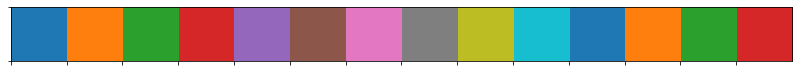

In [126]:
sns.palplot(palette.values())

In [169]:
node_color = [palette.get(param['group']) for name,param in G.nodes(data=True)]
node_sizes = [param['nodesize']*10 for name, param in G.nodes(data=True)]

In [173]:
[a for a in G.nodes(data=True)]

[('azure', {'group': 2, 'nodesize': 13.68}),
 ('.net', {'group': 2, 'nodesize': 75.08}),
 ('sql-server', {'group': 2, 'nodesize': 64.62}),
 ('asp.net', {'group': 2, 'nodesize': 129.55}),
 ('entity-framework', {'group': 2, 'nodesize': 12.88}),
 ('wpf', {'group': 2, 'nodesize': 19.38}),
 ('linq', {'group': 2, 'nodesize': 8.32}),
 ('wcf', {'group': 2, 'nodesize': 12.73}),
 ('c#', {'group': 2, 'nodesize': 321.13}),
 ('tdd', {'group': 12, 'nodesize': 9.45}),
 ('agile', {'group': 12, 'nodesize': 12.22}),
 ('codeigniter', {'group': 6, 'nodesize': 18.71}),
 ('ajax', {'group': 6, 'nodesize': 35.41}),
 ('jquery', {'group': 6, 'nodesize': 208.29}),
 ('mysql', {'group': 6, 'nodesize': 165.43}),
 ('css', {'group': 6, 'nodesize': 341.17}),
 ('php', {'group': 6, 'nodesize': 361.22}),
 ('javascript', {'group': 6, 'nodesize': 649.16}),
 ('json', {'group': 6, 'nodesize': 25.38}),
 ('cloud', {'group': 9, 'nodesize': 10.66}),
 ('amazon-web-services', {'group': 9, 'nodesize': 30.05}),
 ('devops', {'group':

In [170]:
node_color

[(1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.5490196078431373, 0.33725490196078434, 0.294117647058823

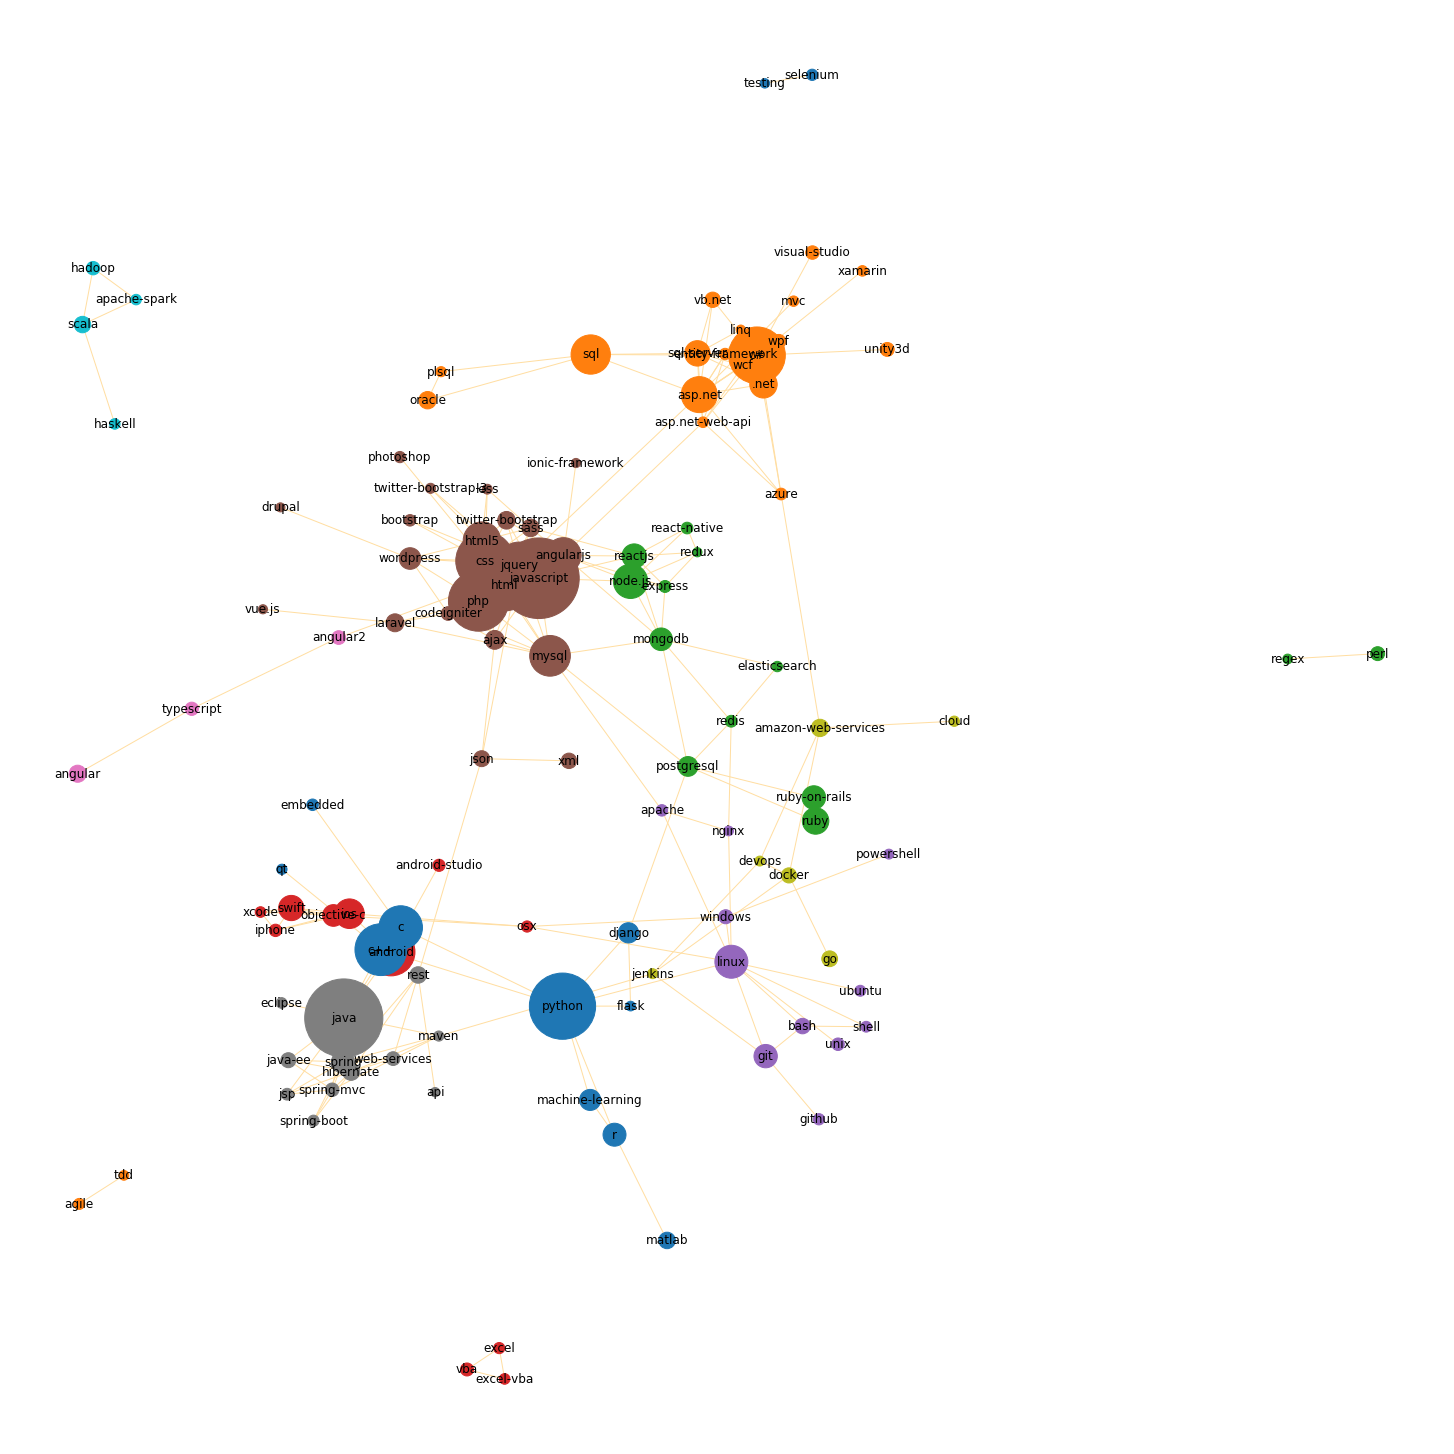

In [162]:
pos = nx.drawing.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize=(20,20))
nx.draw(G, with_labels=True, node_size=node_sizes, node_color=node_color, pos=pos, edge_width=0.5, edge_color='#FFDEA2')
plt.show()

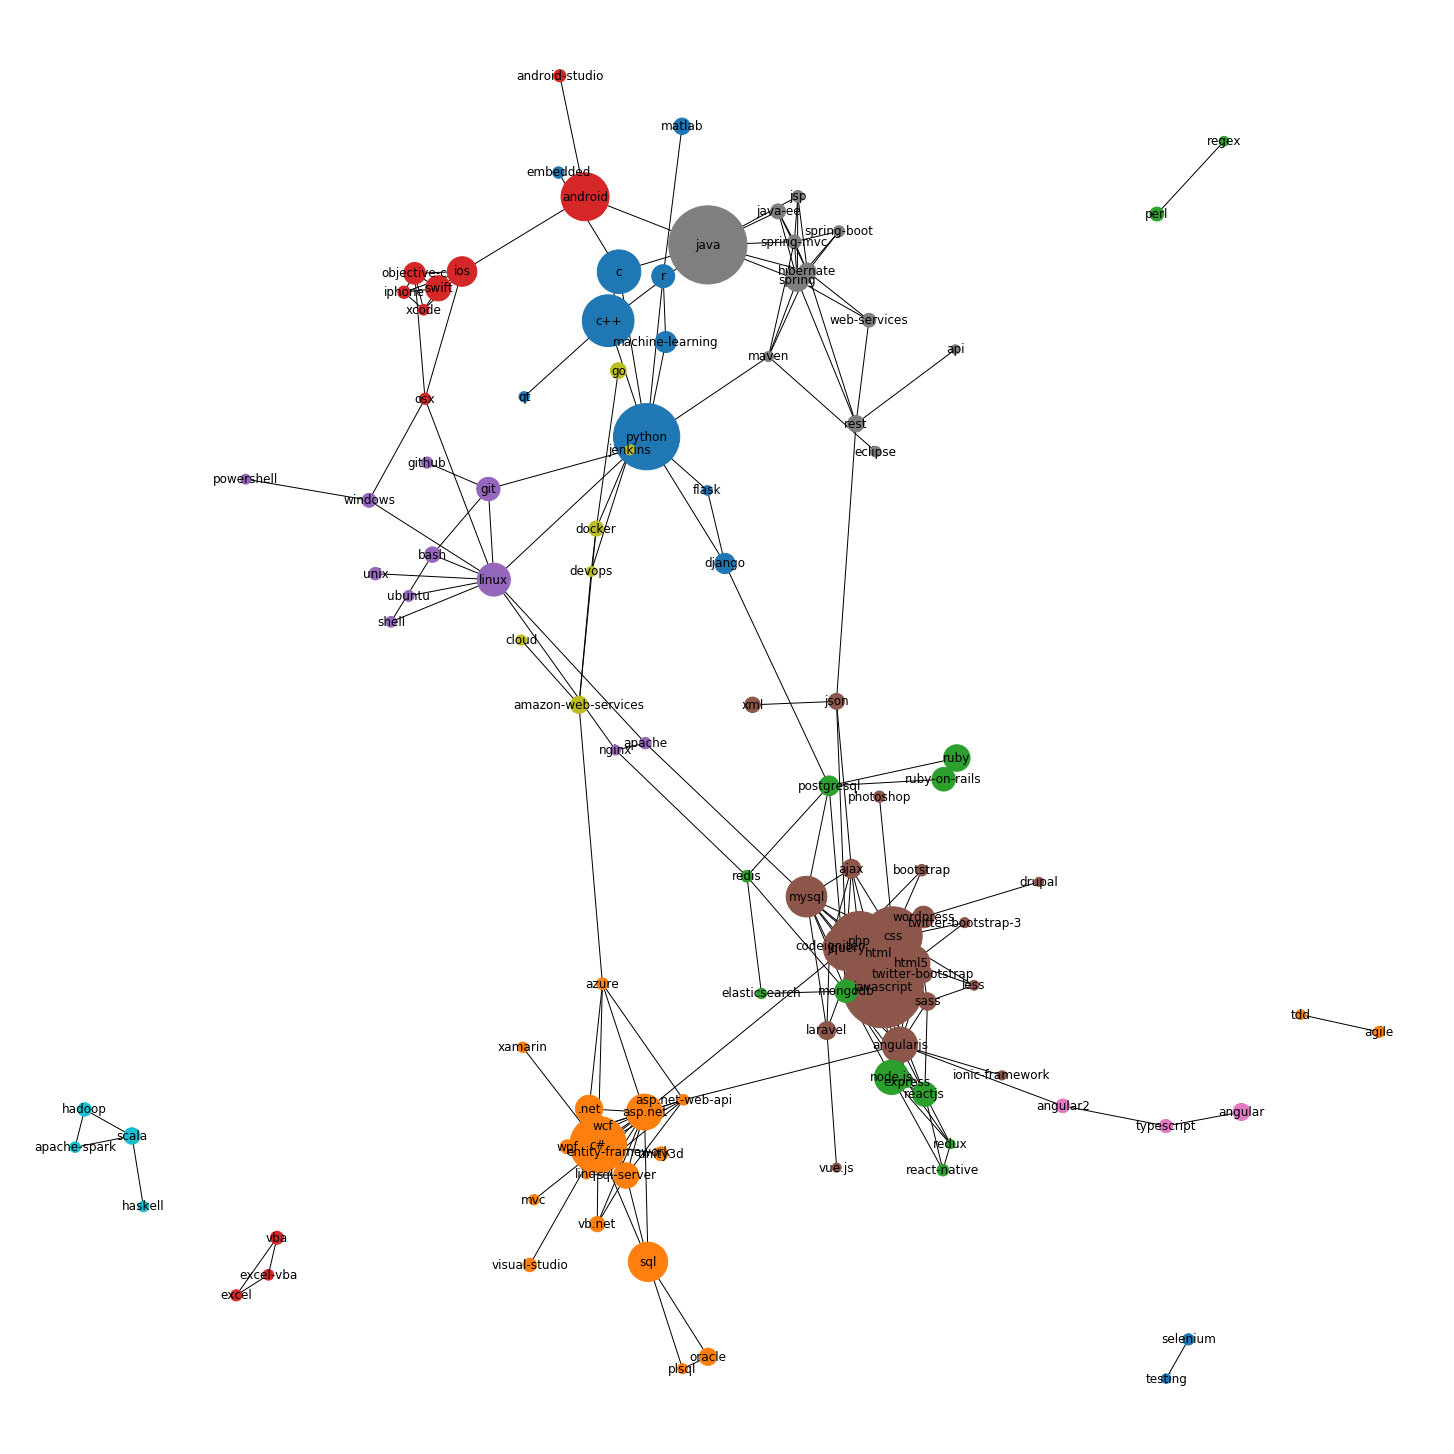

In [188]:
# try edge widths, doesn't seem to work
edge_widths = [param['value'] for source, destination, param in G.edges(data=True)]
pos = nx.drawing.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize=(20,20))
nx.draw(G, with_labels=True, node_size=node_sizes, node_color=node_color, pos=pos, edge_width=edge_widths*100)
plt.show()

In [182]:
edge_widths

[20.933192346640453,
 21.309949593946328,
 23.76407299505805,
 21.585694763313093,
 22.14448701181891,
 32.322524219339904,
 48.40702996199018,
 24.370902505324306,
 32.35092522005943,
 20.501743858149066,
 28.074400427611113,
 62.167895042923824,
 59.67328948689907,
 25.67647418219353,
 45.914651235525035,
 32.62377908692168,
 20.444792111689296,
 24.35477291784809,
 26.29146633095843,
 21.788893442838372,
 21.6722646057341,
 80.4485421720991,
 47.38627215537402,
 28.723178220098205,
 48.113669089462604,
 22.82841216302881,
 28.15902333873328,
 31.58127774617085,
 40.95142172605998,
 23.711346281144568,
 31.183495099591088,
 30.728425581793214,
 24.228201856682702,
 54.005929560097506,
 32.81595165036012,
 38.95749217569616,
 26.468391555977572,
 53.17990345536857,
 25.22293164314289,
 34.587092658719804,
 28.356535431019818,
 29.299880033528954,
 26.748821548289047,
 25.613903617043626,
 25.185135956324604,
 24.67314754872217,
 25.000233473145794,
 27.715543428637943,
 37.14658992420